In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [1]:
from data_cleaner import Data_Cleaner

## Load the training data into feature matrix, class labels, and event ids:

In [26]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Explorational data analysis

In [3]:
print(tX.shape)
print(y.shape)
print(ids.shape)

(250000, 30)
(250000,)
(250000,)


#### Number of unique values, mean, histogram of values

In [26]:
with open("../data/train.csv") as fileobj:
    #print("Feature names: \n\n")
    names = fileobj.readline().rstrip("\n")
    feature_names = names.split(sep=",")[2:] # remove ID and prediction
    #for easier access to variables make index dict
    f_in = {x:v for v,x in enumerate(feature_names)}
    

In [30]:
percentages = []


for feature_name, index in f_in.items():
    f_vals = tX[:,index]
    num_unique = len(np.unique(f_vals))
    print("{} has {} unique values\n".format(feature_name,num_unique))
    
    if feature_name not in ["PRI_jet_all_pt","DER_lep_eta_centrality"]:
        f_vals[f_vals== -999.] = np.NaN
    else:
        f_vals[f_vals == -999.] = np.NaN
        f_vals[f_vals == 0] = np.NaN
        print("0 marks no entry too\n")
    tX[:,index] = f_vals
    
    
    
    percentage = np.count_nonzero(~np.isnan(f_vals))/len(f_vals)
    percentages.append(percentage)
    print("% of samples have entry: {:.1f}".format(percentage*100))
    print("mean without -999. (or 0): {}".format(np.nanmean(f_vals)))
    print("standarddeviation without -999. (or 0): {}".format(np.nanstd(f_vals)))
    print("std/mean: {}".format(np.nanstd(f_vals)/np.nanmean(f_vals)))
    print("--------------------------------\n")

DER_mass_MMC has 108338 unique values

% of samples have entry: 84.8
mean without -999. (or 0): 121.8585283595896
standarddeviation without -999. (or 0): 57.298021449827395
std/mean: 0.4702011604862644
--------------------------------

DER_mass_transverse_met_lep has 101637 unique values

% of samples have entry: 100.0
mean without -999. (or 0): 49.239819276
standarddeviation without -999. (or 0): 35.34481492202995
std/mean: 0.7178095988515819
--------------------------------

DER_mass_vis has 100558 unique values

% of samples have entry: 100.0
mean without -999. (or 0): 81.181981612
standarddeviation without -999. (or 0): 40.8286088749526
std/mean: 0.5029269803992746
--------------------------------

DER_pt_h has 115563 unique values

% of samples have entry: 100.0
mean without -999. (or 0): 57.895961656
standarddeviation without -999. (or 0): 63.65555430684573
std/mean: 1.0994817684360692
--------------------------------

DER_deltaeta_jet_jet has 7087 unique values

% of samples hav

In [119]:
f_in.items()

dict_items([('DER_mass_MMC', 0), ('DER_mass_transverse_met_lep', 1), ('DER_mass_vis', 2), ('DER_pt_h', 3), ('DER_deltaeta_jet_jet', 4), ('DER_mass_jet_jet', 5), ('DER_prodeta_jet_jet', 6), ('DER_deltar_tau_lep', 7), ('DER_pt_tot', 8), ('DER_sum_pt', 9), ('DER_pt_ratio_lep_tau', 10), ('DER_met_phi_centrality', 11), ('DER_lep_eta_centrality', 12), ('PRI_tau_pt', 13), ('PRI_tau_eta', 14), ('PRI_tau_phi', 15), ('PRI_lep_pt', 16), ('PRI_lep_eta', 17), ('PRI_lep_phi', 18), ('PRI_met', 19), ('PRI_met_phi', 20), ('PRI_met_sumet', 21), ('PRI_jet_num', 22), ('PRI_jet_leading_pt', 23), ('PRI_jet_leading_eta', 24), ('PRI_jet_leading_phi', 25), ('PRI_jet_subleading_pt', 26), ('PRI_jet_subleading_eta', 27), ('PRI_jet_subleading_phi', 28), ('PRI_jet_all_pt', 29)])

In [2]:
from proj1_helpers import *
from build_polynomial import build_poly

In [65]:
from k_fold_validate_matthias import build_k_indices
from costs import compute_mse

In [54]:
#y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
from least_squares_matthias import least_squares
from k_fold_validate_matthias import build_k_indices, cross_validation

def cross_validation_prediction(y,x):
    seed = 1
    k_fold = 4
    lambdas = np.logspace(-4, 4, 20)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for lambda_ in lambdas:
        tmp_tr = []
        tmp_te = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_)
            tmp_tr.append(loss_tr)
            tmp_te.append(loss_te)
        rmse_tr.append(np.sqrt(2*np.mean(tmp_tr)))
        rmse_te.append(np.sqrt(2*np.mean(tmp_te)))
        print("lambda: {} done".format(lambda_)) 
    return rmse_tr, rmse_te

def cross_validate_average(y,x, lambda_ ):
    seed = 1
    k_fold = 4
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    tmp_tr = []
    tmp_te = []
    for k in range(k_fold):
        loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_,method="lsne")
        tmp_tr.append(loss_tr)
        tmp_te.append(loss_te)
    rmse_tr = np.sqrt(2*np.mean(tmp_tr))
    rmse_te = np.sqrt(2*np.mean(tmp_te))
    return rmse_tr, rmse_te

In [108]:
for i in range(10):
    if i%2 == 0:
        pass
    else:
        print(i)

1
3
5
7
9


(array([ 2080.,  5799.,  8354.,  9731., 10410., 10456.,  9754.,  8319.,
         5728.,  1912.]),
 array([-257.83100781, -206.26480625, -154.69860469, -103.13240312,
         -51.56620156,    0.        ,   51.56620156,  103.13240312,
         154.69860469,  206.26480625,  257.83100781]),
 <BarContainer object of 10 artists>)

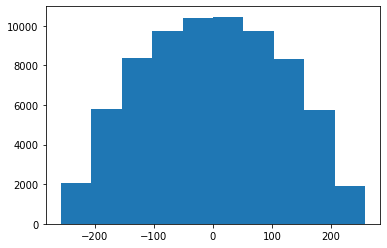

In [11]:
feature_vals = np.copy(tX[:,f_in["PRI_jet_subleading_eta"]])
feature_vals[feature_vals == -999.] = np.NaN

#feature_vals[feature_vals > 0] = np.NaN
plt.hist(np.rad2deg(feature_vals))
#feature_vals

#### Correlation of features

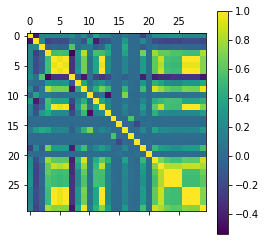

In [12]:
corr_mat = np.corrcoef(tX,rowvar=False)
plt.matshow(corr_mat)
plt.colorbar()
plt.show()

Some variables appear to be more correlated with each other than others

#### Normalize data

In [13]:
def standardize(tx):
    """
    Standardizes the data by substracting mean and dividing by standard deviation
    """
    tx -= np.mean(tx,axis=0)
    tx /= np.std(tx,axis=0)
    
    return tx

In [14]:
tX_standardized = standardize(tX)

#### Do principal component analysis

In [15]:
cov_mat = np.cov(tX_standardized.T) #calculate covariance matrix
eigval_pca, eigvec_pca = np.linalg.eig(cov_mat) #can not be orderd, but they are here

In [16]:
np.sum(percentages)

23.217131999999996

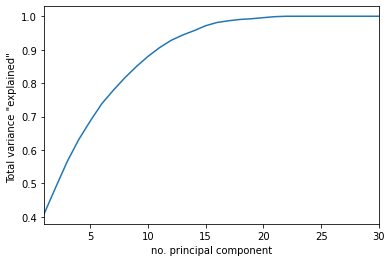

In [17]:
total_eigval = np.sum(eigval_pca)
percentages = [eigval/total_eigval for eigval in eigval_pca]
percentages_cumulative = np.cumsum(percentages)
plt.plot(np.arange(1,len(eigval_pca)+1),percentages_cumulative)
plt.xlim(1,len(eigval_pca))
plt.ylabel("Total variance \"explained\" ")
plt.xlabel("no. principal component")
plt.show()

Arbitrarily choose cutoff when more than 0.95% of the cumulative variance is explained

In [18]:
greater_095 = np.argmax(percentages_cumulative > 0.95) #stops at first true
print("{} principal components can explain more than 95% of the variance".format(greater_095+1))

14 principal components can explain more than 95% of the variance


#### Project onto principal components

  v : (..., M, M) array 
  The normalized (unit "length") eigenvectors, 
  such that the 
        column ``v[:,i]`` is the eigenvector corresponding to the 
        eigenvalue ``w[i]``.

In [19]:
pcas_095 = eigvec_pca[:,:greater_095]
pcas_095_other = (eigvec_pca.T[:][:greater_095]).T
np.allclose(pcas_095_other, pcas_095)

True

In [20]:
pcas_095.shape

(30, 13)

In [21]:
projection_mat = eigvec_pca[:,:greater_095]
projected_data = tX_standardized @  projection_mat

In [22]:
projected_data.shape

(250000, 13)

### Ideas for feature engineering

Missing values\
binary features -1 (negatives), 0 (not there), 1 (positives)\
numericals: replace by some value\


## Make a first prediction 

In [6]:
# load -> clean -> features -> fit/validate -> predict -> submit
from linear_model_base import RidgeRegression
import numpy as np

In [7]:
from data_cleaner import Data_Cleaner

In [8]:
from build_polynomial import build_poly

In [9]:
def autofeature_detector(max_degree,lambda_):
    #init feature
    data_cleaner = Data_Cleaner("../data/train.csv")
    data_cleaner._fill_with_NaN()
    data_cleaner.replace_with_mean()
    tX_orig = np.copy(data_cleaner.tX)
    results_tr = np.zeros((tX_orig.shape[1],max_degree))
    results_te = np.zeros((tX_orig.shape[1],max_degree))
    
    for feature_index in range(tX_orig.shape[1]):
        data_cleaner.tX = np.delete(data_cleaner.tX, feature_index, axis=1)
        #print(data_cleaner.tX.shape)
        for degree in range(max_degree):
            #print(degree)
            #data_cleaner.tX = np.concatenate([data_cleaner.tX, np.power(tX_orig[:,feature_index], degree+1)[:,np.newaxis]],axis=1) 
            data_cleaner.tX = np.concatenate([data_cleaner.tX, build_poly(tX_orig[:,feature_index], degree+1)],axis=1)
            data_cleaner.normalize()
            #print(data_cleaner.tX[0,-5:])
            model = RidgeRegression(data_cleaner)
            results_tr[feature_index,degree], results_te[feature_index,degree] =  model.cross_validation(5,lambda_=lambda_)                     
            data_cleaner.tX = tX_orig
        print("feature {} done".format(feature_index))
    return results_tr, results_te

In [ ]:
results_tr, results_te = autofeature_detector(20,0.00013738237958832637)

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from plots import cross_validation_visualization

## Generate predictions and save ouput in csv format for submission:

In [193]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [7]:
cleaner_data_test = Data_Cleaner("../data/test.csv")
#cleaner_data_test.build_polynomials_from_degree_array(np.argmin(np.around(results_te,decimals=4), axis=1))


In [47]:
cleaner_data_test.tX.shape

(568238, 132)

In [45]:
cleaner_data_test.normalize()

In [8]:
weights = w #these weights must come from a run of the model with the optimal hyper parameters and features

In [9]:
#OUTPUT_PATH = '../scripts/submission_cleaned_polynomial_features_selected_least_squares.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, cleaner_data_test.tX)
#create_csv_submission(cleaner_data_test.ids, y_pred, OUTPUT_PATH)

In [195]:
OUTPUT_PATH = '../scripts/submission_cleaned.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [10]:
y_pred

array([-1., -1., -1., ..., -1.,  1., -1.])

In [16]:
def estimate_Leaderboard_score(y_true,weights,data):
    """Helper function estimating the categorical accuracy on the leaderscore
    """
    y_pred = predict_labels(weights, data)
    N_tot = y_pred.shape[0]
    N_true = len(np.where(y_pred == y_true)[0])
    categorical_acuracy = N_true/N_tot
    return categorical_acuracy

In [24]:
y_true = np.random.choice([1.,1.],size=y_pred.shape[0])

In [26]:
estimate_Leaderboard_score(y_true,weights,cleaner_data_test.tX)

0.2512415572348206